In [32]:
%reload_ext autoreload
%autoreload 2

import sklearn
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from godec.godec import *
from sdp import *
import time

In [49]:
MSE_sdp = []
MSE_naive = []
MSE_godec = []

sparsity = {
    "naive": [],
    "godec": [],
    "sdp": [],
}

ranks = {
    "naive": [],
    "godec": [],
    "sdp": [],
}

runtimes = {
    "naive": [],
    "godec": [],
    "sdp": [],
}

tol=1e-3

for pp in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    r = pp//5
    for X in np.random.randn(1, pp, pp):
        # Solve SDP
        start = time.time()
        L_sdp, S_sdp, LS_sdp, err_sdp = sdp_naive(X, r, tol=tol)
        end = time.time()
        runtimes["sdp"].append(end-start)
        MSE_sdp.append(err_sdp)

        # Solve GoDec
        start = time.time()
        L_godec, S_godec, LS_godec, err_godec = godec(X, r, tol=tol)
        end = time.time()
        runtimes["godec"].append(end-start)
        MSE_godec.append(err_godec)

        # Solve naive
        start = time.time()
        L_naive, S_naive, LS_naive, err_naive = svd_naive(X, r)
        end = time.time()
        runtimes["naive"].append(end-start)
        MSE_naive.append(err_naive)

        # Save sparsity
        sparsity["naive"].append(np.sum(np.abs(S_naive) > 1e-5)/pp**2)
        sparsity["godec"].append(np.sum(np.abs(S_godec) > 1e-5)/pp**2)
        sparsity["sdp"].append(np.sum(np.abs(S_sdp) > 1e-5)/pp**2)

        # Save ranks
        ranks["naive"].append(np.linalg.matrix_rank(L_naive))
        ranks["godec"].append(np.linalg.matrix_rank(L_godec))
        ranks["sdp"].append(np.linalg.matrix_rank(L_sdp))

/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  1 error:  1.0325475088079563
iter:  2 error:  0.26446189458250824
iter:  3 error:  0.21308228201527443
iter:  4 error:  0.08318090555040508
iter:  5 error:  0.047706749856865176
iter:  6 error:  0.0213766503545149
iter:  7 error:  0.011721638047648664
iter:  8 error:  0.005540188104067474
iter:  9 error:  0.002423622134311163
iter:  10 error:  0.0018527260309482714
iter:  11 error:  0.0004849160789429652
iter:  1 error:  5.225982234721645e-17
iter:  1 error:  1.0259341366839405
iter:  2 error:  0.25850356749683506
iter:  3 error:  0.20655439654964308
iter:  4 error:  0.07943317858609641
iter:  5 error:  0.04573867280052296
iter:  6 error:  0.020532856494311153
iter:  7 error:  0.011083237655169673
iter:  8 error:  0.00558167605437744
iter:  9 error:  0.002250167955019723
iter:  10 error:  0.0017293205232849788
iter:  11 error:  0.0006018806567291054
iter:  1 error:  3.15265708919926e-17
iter:  1 error:  0.9847508204140446
iter:  2 error:  0.24766964629611762
iter:  3 error:  0.1

/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  3 error:  0.20086112975989218
iter:  4 error:  0.0768397898507511
iter:  5 error:  0.044473323754249075
iter:  6 error:  0.02000829706554947
iter:  7 error:  0.010601707060386432
iter:  8 error:  0.005582549719042472
iter:  9 error:  0.002131721914087666
iter:  10 error:  0.0016211153499907035
iter:  11 error:  0.0006862761902640845
iter:  1 error:  3.4218799111517473e-17
iter:  1 error:  1.0204779748250388
iter:  2 error:  0.2564377708839683
iter:  3 error:  0.20475629939625462


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  4 error:  0.0781813341660983
iter:  5 error:  0.045337147195813526
iter:  6 error:  0.020423013250407386
iter:  7 error:  0.010725679306002166
iter:  8 error:  0.005749916769656225
iter:  9 error:  0.0021546663122387795
iter:  10 error:  0.0016217881620543089


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  11 error:  0.0007457640440809603
iter:  1 error:  3.5400665624447887e-17
iter:  1 error:  1.005983556218843
iter:  2 error:  0.25274973085489166
iter:  3 error:  0.20187292163417242
iter:  4 error:  0.07700413219563143
iter:  5 error:  0.0446970708940391
iter:  6 error:  0.02015384874817453


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  7 error:  0.010530683294427799
iter:  8 error:  0.005699370359348944
iter:  9 error:  0.0021167580566548764
iter:  10 error:  0.0015803995186079425
iter:  11 error:  0.0007618404469608102
iter:  1 error:  3.3620089113961977e-17


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  1 error:  0.998181798998454
iter:  2 error:  0.2507610946065904
iter:  3 error:  0.200328203835248
iter:  4 error:  0.07636283471229967
iter:  5 error:  0.04435517878288798
iter:  6 error:  0.020009028711028796


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  7 error:  0.01042164260025626
iter:  8 error:  0.0056760196792436275
iter:  9 error:  0.002093630431688359
iter:  10 error:  0.0015566947326818284
iter:  11 error:  0.0007716724362955852
iter:  1 error:  3.355826351330146e-17
iter:  1 error:  0.9987314825340999
iter:  2 error:  0.25087041123224857
iter:  3 error:  0.20048125207319095
iter:  4 error:  0.0763694008330395


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  5 error:  0.04437909416313519
iter:  6 error:  0.02004316345327365
iter:  7 error:  0.010395228772253583
iter:  8 error:  0.0056987091903910134


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  9 error:  0.00209506816446848
iter:  10 error:  0.0015403598643158741
iter:  11 error:  0.0007916465034242742
iter:  1 error:  3.3913948064434856e-17


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


iter:  1 error:  0.9786269585154433
iter:  2 error:  0.24579842971913102
iter:  3 error:  0.19645170406910192
iter:  4 error:  0.07481520914939699


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  5 error:  0.043481260599771365
iter:  6 error:  0.019648981682088357
iter:  7 error:  0.010173371620805253


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


iter:  8 error:  0.005590200165359279
iter:  9 error:  0.0020545683906136028
iter:  10 error:  0.0015018093208396888


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver 

iter:  11 error:  0.0007834707057231093
iter:  1 error:  3.535610277248134e-17
iter:  1 error:  0.9871045577191803
iter:  2 error:  0.24790489995012793


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


iter:  3 error:  0.19818596801392335
iter:  4 error:  0.07544128482851692
iter:  5 error:  0.0438559854820795


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


iter:  6 error:  0.019836046345982388
iter:  7 error:  0.010239509196960055
iter:  8 error:  0.005650684040658212


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


iter:  9 error:  0.0020735661192264236
iter:  10 error:  0.001502536417553979
iter:  11 error:  0.000802869349655744
iter:  1 error:  3.538242202719261e-17


/opt/homebrew/Caskroom/miniconda/base/envs/vision/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [26]:
MSE_godec[0]

[3.84061482552208e-17]

In [27]:
MSE_sdp[0]

[1.0129949096438806,
 0.25455617719258733,
 0.2032403957516364,
 0.07761560864491063,
 0.04500215631273408,
 0.02026784237663902,
 0.010656132299922108,
 0.005701479343576944,
 0.0021392929819633965,
 0.0016138331954116938,
 0.0007351418467061257,
 0.0001483068159527819,
 0.0005080392427813413,
 0.00011518001051511687,
 0.00010831195585845474,
 0.0002514884189843805,
 0.0002138872850123576,
 0.00011732991746369951,
 9.06644079391199e-05,
 0.0001573773817428047,
 0.00014505864962511983,
 6.748875237161556e-05,
 6.489843507534188e-05,
 0.00010766764865661032,
 9.263070315797942e-05,
 4.080332558361959e-05,
 4.728191053862107e-05,
 7.268866837300597e-05,
 5.923269328203118e-05,
 2.4924142198580582e-05,
 3.417689816913161e-05,
 4.8626765342312486e-05,
 3.757682220615386e-05,
 1.5624107889231852e-05,
 2.4285919450973473e-05,
 3.247921881731369e-05,
 2.374649683467332e-05,
 9.888378104878503e-06]

In [35]:
mse_naive[0]

NameError: name 'mse_naive' is not defined

Text(0, 0.5, 'Log error')

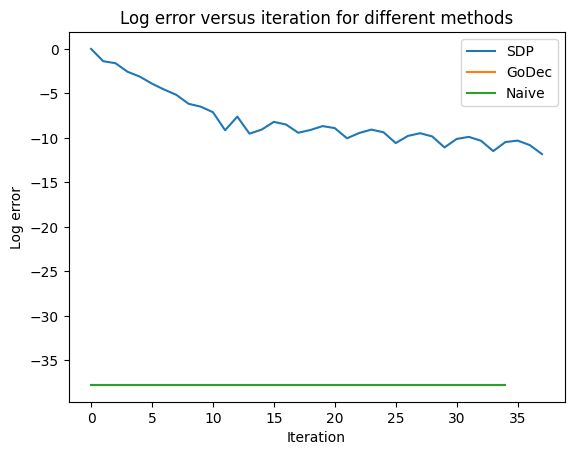

In [36]:
plt.plot(np.log(MSE_sdp[-1]), label='SDP')
plt.plot(np.log(np.repeat(MSE_godec[-1], 35)), label='GoDec')
plt.plot(np.log(np.repeat(MSE_naive[-1], 35)), label='Naive')
plt.legend()
plt.title('Log error versus iteration for different methods')
plt.xlabel('Iteration')
plt.ylabel('Log error')

Text(0.5, 0, 'Log Problem Size')

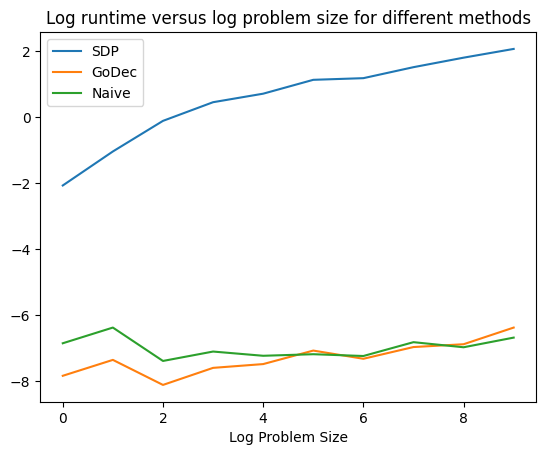

In [41]:
# plot log runtimes
plt.plot(np.log(runtimes["sdp"]), label='SDP')
plt.plot(np.log(runtimes["godec"]), label='GoDec')
plt.plot(np.log(runtimes["naive"]), label='Naive')
plt.legend()
plt.title('Log runtime versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Log Runtime')

Text(0, 0.5, 'Sparsity')

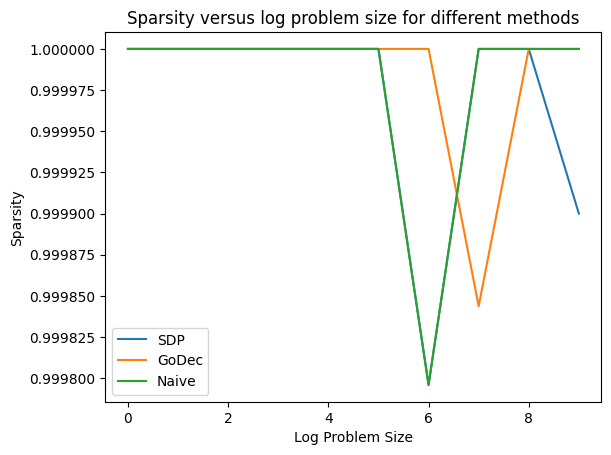

In [52]:
# plot sparsity
plt.plot(sparsity["sdp"], label='SDP')
plt.plot(sparsity["godec"], label='GoDec')
plt.plot(sparsity["naive"], label='Naive')

plt.legend()
plt.title('Sparsity versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Sparsity')


Text(0, 0.5, 'Log Sparsity')

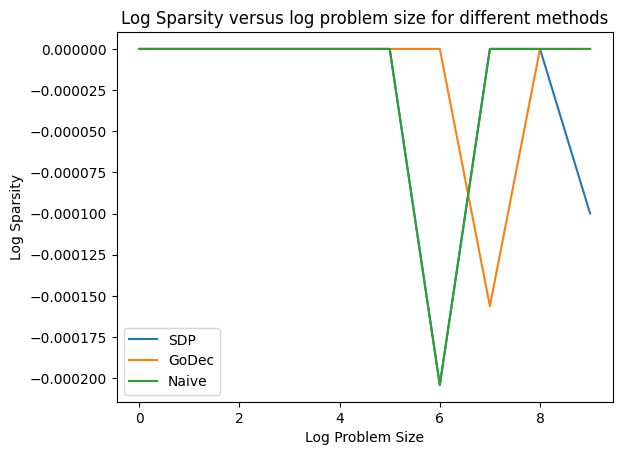

In [51]:
# plot log sparsity 
plt.plot(np.log(sparsity["sdp"]), label='SDP')
plt.plot(np.log(sparsity["godec"]), label='GoDec')
plt.plot(np.log(sparsity["naive"]), label='Naive')

plt.legend()
plt.title('Log Sparsity versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Log Sparsity')


Text(0, 0.5, 'Rank')

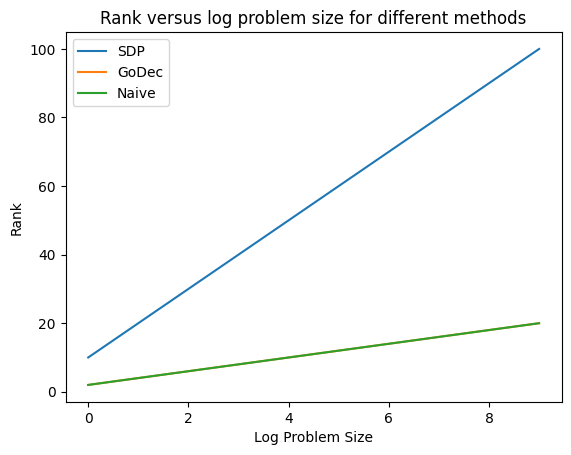

In [50]:
# plot ranks
plt.plot(ranks["sdp"], label='SDP')
plt.plot(ranks["godec"], label='GoDec')
plt.plot(ranks["naive"], label='Naive')

plt.legend()

plt.title('Rank versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Rank')